# Project: Investigate a Dataset - No-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
<li><a href="#limitations">Limitations</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 
The dataset includes 14 columns, about the patient informations, appointment informations and `No-show` data. The most important data is if the patient show-up or no-show to the appointment. 

The columns in the dataset 

| id | name | data type | description |
| - | - | - | - |
| 1 | PatientId | Integer | Identification of a patient |
| 2 | AppointmentID | Integer | Identification of each appointment |
| 3 | Gender | Text | Male or Female |
| 4 | DataMarcacaoConsulta | Datetime | The day of the actuall appointment, when they have to visit the doctor |
| 5 | DataAgendamento | Datetime | The day someone called or registered the appointment, this is before appointment of course |
| 6 | Age | Integer | The patient's age |
| 7 | Neighbourhood | Text | The location of the appointment |
| 8 | Scholarship | Integer | True of False |
| 9 | Hipertension | Integer | True or False |
| 10 | Diabetes | Integer | True or False |
| 11 | Alcoholism | Integer | True or False |
| 12 | Handcap | Integer | True or False |
| 13 | SMS_received | Integer | The number of messages sent to the patient |
| 14 | No-show | Text | True or False |

### Questions for Analysis
1. The ratio of a no-show appointment? 
2. Which gender cancels the appointment more than?
3. What is the affect of the duration between schedule date and appointment date to no-show decision?
4. What is the affect of the age to cancel decision?
5. What is the affect of SMS remind to cancel decision?

In [3]:
%%capture
!pip install --upgrade numpy
!pip install --upgrade pandas
!pip install --upgrade matplotlib

In [4]:

import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

# check pandas verion
print('pandas verion:', pd.__version__)

pandas verion: 1.5.0


In [5]:
def plot_df_bar_chart(data, xlabel, ylabel, xticks, xticks_label, title, legend):
    data.plot.bar()
    plt.xticks(xticks, xticks_label, rotation=0)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    if legend:
        plt.legend(legend)
    plt.show()

def plot_df_pie_chart(data, labels, title):
    data.plot.pie(autopct='%.2f', labels=labels, startangle=90)
    plt.axis('equal')
    plt.title(title)
    plt.show()

<a id='wrangling'></a>
## Data Wrangling

### General Properties

In [6]:
df = pd.read_csv('./Database_No_show_appointments/noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [7]:
df.info()
# -->no column has null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [8]:
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [9]:
# check value of Gender column
df['Gender'].value_counts()

F    71840
M    38687
Name: Gender, dtype: int64

In [10]:
# check value of No-show to ensure it contains only Yes and No value
df['No-show'].value_counts()

No     88208
Yes    22319
Name: No-show, dtype: int64

### Data Cleaning

In [11]:
# convert PatientId and AppointmentID data from number to string 
df['PatientId'] = df['PatientId'].astype(int).astype(str)
df['AppointmentID'] = df['AppointmentID'].astype(str)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110527 non-null  object
 1   AppointmentID   110527 non-null  object
 2   Gender          110527 non-null  object
 3   ScheduledDay    110527 non-null  object
 4   AppointmentDay  110527 non-null  object
 5   Age             110527 non-null  int64 
 6   Neighbourhood   110527 non-null  object
 7   Scholarship     110527 non-null  int64 
 8   Hipertension    110527 non-null  int64 
 9   Diabetes        110527 non-null  int64 
 10  Alcoholism      110527 non-null  int64 
 11  Handcap         110527 non-null  int64 
 12  SMS_received    110527 non-null  int64 
 13  No-show         110527 non-null  object
dtypes: int64(7), object(7)
memory usage: 11.8+ MB


In [12]:
# convert Gender data from text to integer: F -> 0 and Yes -> 1
df['Gender'] = df['Gender'].apply(lambda x: 0 if x == "F" else 1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,-2147483648,5642903,0,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,1,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,0,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,0,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,0,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [13]:
# convert ScheduledDay and AppointmentDay from string to Datetime 
df['ScheduledDay'] = df['ScheduledDay'].apply(lambda x: datetime.strptime(x.replace('T', ' ').replace('Z', ''), '%Y-%m-%d %H:%M:%S'))
df['AppointmentDay'] = df['AppointmentDay'].apply(lambda x: datetime.strptime(x.replace('T', ' ').replace('Z', ''), '%Y-%m-%d %H:%M:%S'))
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,-2147483648,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,-2147483648,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,-2147483648,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,-2147483648,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,-2147483648,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [14]:
# convert No-show data from text to integer: No -> 0 and Yes -> 1
df['No-show'] = df['No-show'].apply(lambda x: 0 if x == "No" else 1)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,-2147483648,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,-2147483648,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,-2147483648,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,-2147483648,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,-2147483648,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [15]:
# remove the record has age is -1
df = df.drop(index=df[df['Age']==-1].index)
df.shape

(110526, 14)

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   PatientId       110526 non-null  object        
 1   AppointmentID   110526 non-null  object        
 2   Gender          110526 non-null  int64         
 3   ScheduledDay    110526 non-null  datetime64[ns]
 4   AppointmentDay  110526 non-null  datetime64[ns]
 5   Age             110526 non-null  int64         
 6   Neighbourhood   110526 non-null  object        
 7   Scholarship     110526 non-null  int64         
 8   Hipertension    110526 non-null  int64         
 9   Diabetes        110526 non-null  int64         
 10  Alcoholism      110526 non-null  int64         
 11  Handcap         110526 non-null  int64         
 12  SMS_received    110526 non-null  int64         
 13  No-show         110526 non-null  int64         
dtypes: datetime64[ns](2), int64(9), obje

<a id='eda'></a>
## Exploratory Data Analysis

### Research Question 1: The ratio of a no-show appointment? 

In [17]:
# Count the no-show and show-up quantity
no_show_quantity = df[df['No-show'] == 0].shape[0]
show_up_quantity = df[df['No-show'] == 1].shape[0]

In [18]:
print("Num no show", no_show_quantity)
print("No show ratio", no_show_quantity / len(df))

print("Num show up", show_up_quantity)
print("Show up ratio", show_up_quantity / len(df))

Num no show 88207
No show ratio 0.7980656135208005
Num show up 22319
Show up ratio 0.20193438647919945


In [19]:
# Is no-show is bigger ?
print("no-show is greater than show-up?", no_show_quantity > show_up_quantity)
print("The different quantity: ", abs(no_show_quantity - show_up_quantity))

no-show is greater than show-up? True
The different quantity:  65888


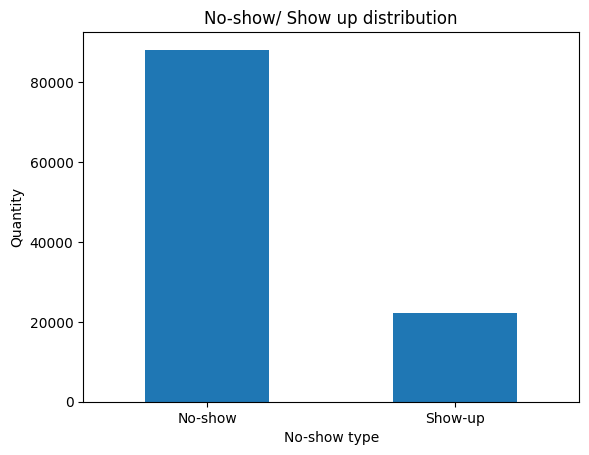

In [20]:
plot_df_bar_chart(data=df['No-show'].value_counts(), xlabel="No-show type", ylabel="Quantity", xticks=[0,1], xticks_label=["No-show", "Show-up"], title='No-show/ Show up distribution', legend=None)

No show data is greater than Show up data, the data is skewed to No show data

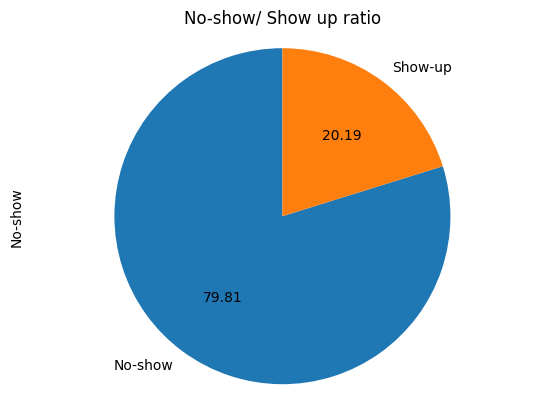

In [21]:
plot_df_pie_chart(data=df['No-show'].value_counts(), labels=["No-show", "Show-up"], title='No-show/ Show up ratio')

The ratio of No show data is 79.81% and Show up data is 20.19%, greater than 4 times. It demonstrates the skewed of data 

### Research Question 2: Which gender cancels the appointment more than?

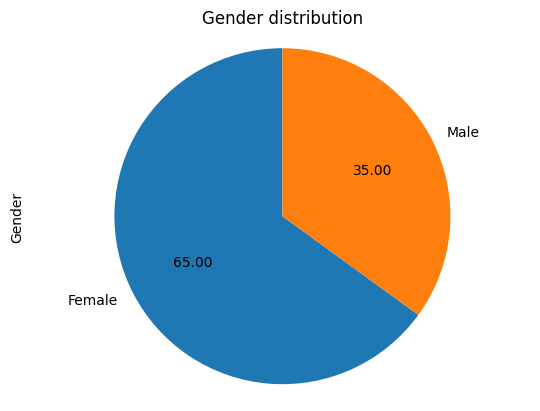

In [22]:
# Distribution of gender
plot_df_pie_chart(data=df['Gender'].value_counts(), labels=["Female", "Male"], title="Gender distribution")

The ratio of Male/ Female is 35% / 65%

In [23]:
# The quantity of gender by No-show
df.groupby(by=['Gender', 'No-show']).size()

Gender  No-show
0       0          57245
        1          14594
1       0          30962
        1           7725
dtype: int64

In [24]:
# quantity of no show by gender
df[['No-show', 'Gender']].value_counts()

No-show  Gender
0        0         57245
         1         30962
1        0         14594
         1          7725
dtype: int64

In [25]:
# The distribution of no show by gender
(df[['No-show', 'Gender']].value_counts() / df[['No-show']].value_counts().repeat(2).values.reshape((4)))

No-show  Gender
0        0         0.648985
         1         0.351015
1        0         0.653882
         1         0.346118
dtype: float64

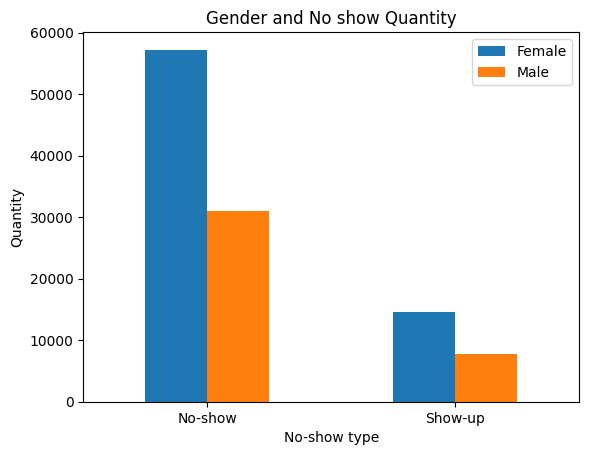

In [26]:
plot_df_bar_chart(data=df[['No-show', 'Gender']].value_counts().unstack(), xlabel="No-show type", ylabel="Quantity", xticks=[0,1], xticks_label=["No-show", "Show-up"], title='Gender and No show Quantity', legend=['Female', 'Male'])


The quantity of No-show data in Female is greater than Male, and it same in Show up data

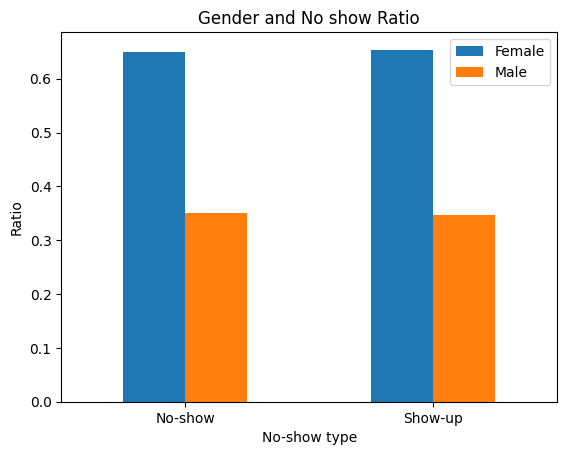

In [27]:
plot_df_bar_chart(data=(df[['No-show', 'Gender']].value_counts() / df[['No-show']].value_counts().repeat(2).values.reshape((4))).unstack(), xlabel="No-show type", ylabel="Ratio", xticks=[0,1], xticks_label=["No-show", "Show-up"], title='Gender and No show Ratio', legend=['Female', 'Male'])

But the ratio of No show and Show up data by gender is approximately equal.

Female cancels the appointment greater than Male, the ratio of cancel in female is 65% and in male 35%, and same ratio of show-up appointment. 

Compare with the gender ratio (65% female and 35% male), see that the cancel ratio is not affected by gender 

### Research Question 3: What is the affect of the duration between schedule date and appointment date to no-show decision?

In [28]:
df['Duration_appointment'] = abs((df['AppointmentDay'] - df['ScheduledDay']))
df['Duration_appointment'] = df['Duration_appointment'].apply(lambda x:x.days)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration_appointment
0,-2147483648,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0
1,-2147483648,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0
2,-2147483648,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0
3,-2147483648,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0
4,-2147483648,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0


In [29]:
df['Duration_appointment'].value_counts()

0      43775
1       6729
3       5290
6       4907
5       4037
       ...  
131        1
124        1
116        1
145        1
122        1
Name: Duration_appointment, Length: 128, dtype: int64

In [30]:
# duration of no-show appointment
duration_no_show_df = df[df['No-show']==0]['Duration_appointment'].value_counts()
duration_no_show_df.tail()

81     1
126    1
124    1
116    1
122    1
Name: Duration_appointment, dtype: int64

In [31]:
# dont calculate the duration is less than 10 days
duration_no_show_df = duration_no_show_df[duration_no_show_df>10]
duration_no_show_df.head()

0    40870
1     5123
3     4059
6     3597
5     3036
Name: Duration_appointment, dtype: int64

In [32]:
df['Duration_appointment'].value_counts()

0      43775
1       6729
3       5290
6       4907
5       4037
       ...  
131        1
124        1
116        1
145        1
122        1
Name: Duration_appointment, Length: 128, dtype: int64

In [33]:
# ratio of duration of no-show appointment by day
duration_no_show_df / df['Duration_appointment'].value_counts()

0      0.933638
1      0.761332
2      0.764706
3      0.767297
4      0.733903
         ...   
154         NaN
161         NaN
168         NaN
175         NaN
178         NaN
Name: Duration_appointment, Length: 128, dtype: float64

In [34]:
# Top 20 ratio of duration of no-show appointment by day
(duration_no_show_df / df['Duration_appointment'].value_counts()).dropna().sort_values(ascending=False).head(20)

0     0.933638
61    0.792746
90    0.785714
84    0.783784
70    0.780000
83    0.777778
60    0.770370
3     0.767297
2     0.764706
1     0.761332
89    0.758621
5     0.752044
55    0.748768
51    0.744444
62    0.735000
29    0.734375
4     0.733903
6     0.733034
49    0.730769
8     0.725857
Name: Duration_appointment, dtype: float64

In [35]:
# mean of ratio of duration of no-show appointment by day
(duration_no_show_df / df['Duration_appointment'].value_counts()).dropna().mean()

0.6866940554135348

Top 10 the duration cancel the appointment is showed above.

93% the appointment booked in the same day is canceled  

### Research Question 4: What is the affect of the age to cancel decision?

In [36]:
# split the age to age range by 10 years
# ex: 6 -> 0, 16-> 1, 26-> 2
df["age_range"] = df['Age'].apply(lambda x: x//10)
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show,Duration_appointment,age_range
0,-2147483648,5642903,0,2016-04-29 18:38:08,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,0,0,6
1,-2147483648,5642503,1,2016-04-29 16:08:27,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,0,0,5
2,-2147483648,5642549,0,2016-04-29 16:19:04,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,0,0,6
3,-2147483648,5642828,0,2016-04-29 17:29:31,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,0,0
4,-2147483648,5642494,0,2016-04-29 16:07:23,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,0,0,5


In [37]:
# mean of ratio of no-show appointment by age range
(df[df['No-show']==0]['age_range'].value_counts() / df['age_range'].value_counts()).mean()

0.7870308243857248

In [38]:
# Top ratio of no-show appointment by age range
(df[df['No-show']==0]['age_range'].value_counts() / df['age_range'].value_counts()).sort_values(ascending=False)

10    1.000000
6     0.849276
7     0.847995
8     0.842159
5     0.825002
0     0.800629
9     0.798030
4     0.797312
3     0.782480
2     0.753267
1     0.748222
11    0.400000
Name: age_range, dtype: float64

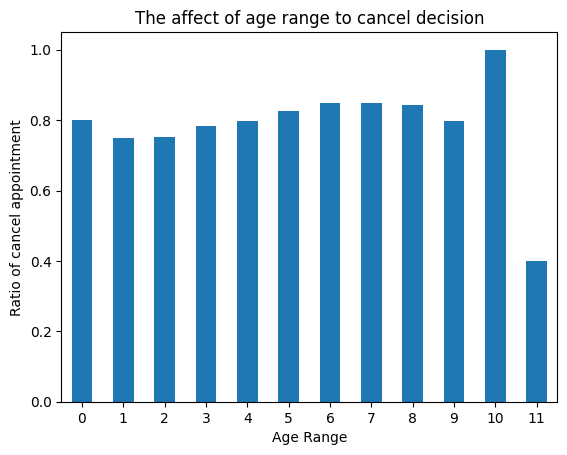

In [39]:
plot_df_bar_chart(data=(df[df['No-show']==0]['age_range'].value_counts() / df['age_range'].value_counts()), xlabel='Age Range', ylabel='Ratio of cancel appointment', xticks=sorted(df['age_range'].unique()), xticks_label=sorted(df['age_range'].unique()), legend=None, title='The affect of age range to cancel decision')

The ratios of cancel by age range are approximately equal, about 80%. The ratios of age range 10 and 11 are difference with others, because the quantity of sample to calculate the ratio is so small

### Research Question 5: What is the affect of SMS remind to cancel decision?

In [40]:
df['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

In [41]:
df[df['No-show']==0]['SMS_received'].value_counts()

0    62509
1    25698
Name: SMS_received, dtype: int64

In [42]:
# ratio of no-show appointment by the number of sms receive
(df[df['No-show']==0]['SMS_received'].value_counts() / df['SMS_received'].value_counts()).sort_values(ascending=False)

0    0.832965
1    0.724255
Name: SMS_received, dtype: float64

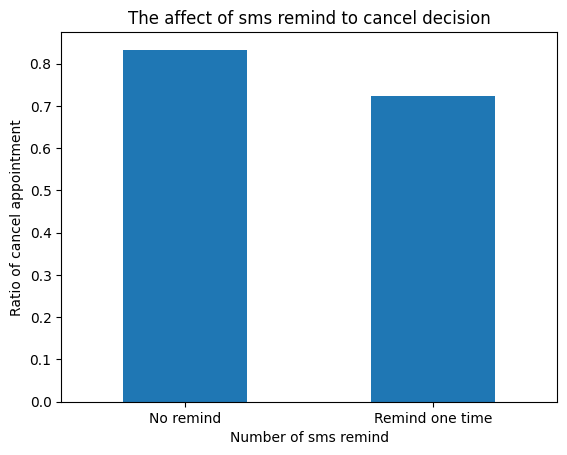

In [43]:
plot_df_bar_chart(data=(df[df['No-show']==0]['SMS_received'].value_counts() / df['SMS_received'].value_counts()), xlabel='Number of sms remind', ylabel='Ratio of cancel appointment', xticks=[0,1], xticks_label=["No remind", "Remind one time"], legend=None, title='The affect of sms remind to cancel decision')

The ratio of the appointments that canceled if that no reminded is greater than if it reminded. And the difference is greater 10%  

<a id='conclusions'></a>

## Conclusions
1. Research Question 1: The ratio of a no-show appointment? 

    The number of no show: 88208, account for ~80% 
    
    The number of show up 22319, account for ~20%


2. Research Question 2: Which gender cancels the appointment more than?

    The ratio of Male/ Female is 35%:65%

    The ratio of cancel the appointment by gender is approximately 35%:65% 

    --> Gender doesn't affect to the cancel decision.

3. Research Question 3: What is the affect of the duration between schedule date and appointment date to no-show decision?

    93% the appointment booked in the same day is canceled

    The ratio of cancel the appointment with the duration of schedule that less than 10 days are approximate 75%.

    The mean of cancel the appointment by the duration of schedule is 68%

    --> The appointment booked in the same day is greatest to cancel by patient. If the appointment booked in 10 days, the ratio of cancel is 75%.


4. Research Question 4: What is the affect of the age to cancel decision?

    The ratio of cancel the appointment by age range is ~78%, and there is no volatility between the age ranges 

    --> Age doesn't affect to the cancel decision


5. Research Question 5: What is the affect of SMS remind to cancel decision?

    The ratio of cancel the appointment if the patient receives the sms remind is 72.4%, and if the patient doesn't receive the sms remind, the ratio is 83.3%
    
    --> SMS remind affect 11% to the cancel decision

<a id='limitations'></a>

## Limitations
- The data is skewed to "No-show" data, with the difference is 60% of data, and all statistics have to convert to ratio of the relation of that field to "No-show" data. If I dont do it, the statistics is not accurate
- The calculation of ratio on the fields is so difficult, with different version of Pandas, the input data is difference and I have to convert to fit with specific version of Pandas. The version of Pandas I use is 1.1.5, and the newest version is 1.15.0, and it have so many differences in function, input data, data type, ...

*Note*: You need to check the version of Pandas to ensure the code run perfectly
